# Imports

In [106]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import imageio
import os

# Binarizing function

In [47]:
def generateBinarizedImage(img, max_cr, max_cb, shift):
    img = img.copy()
    
    bounds_cr = [max_cr - shift, max_cr + shift]
    bounds_cb = [max_cb - shift, max_cb + shift]
    YCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
    mask = (YCrCb[:, :, 1] > bounds_cr[0]) & (YCrCb[:, :, 1] < bounds_cr[1]) & (YCrCb[:, :, 2] > bounds_cb[0]) & (YCrCb[:, :, 2] < bounds_cb[1])
    img[~mask] = 0
    return img

# Loading LFW dataset

In [50]:
lfw_people = fetch_lfw_people(color=True)
lfw_people_no_slice = fetch_lfw_people(color=True, slice_=None)

In [3]:
lfw_people_images = lfw_people["images"].astype("uint8")
lfw_people_targets = lfw_people["target"]
lfw_people_target_names = lfw_people["target_names"]

In [ ]:
lfw_people_images_no_slice = lfw_people_no_slice["images"].astype("uint8")
lfw_people_targets_no_slice = lfw_people_no_slice["target"]
lfw_people_target_names_no_slice = lfw_people_no_slice["target_names"]

# Retriving George Bush and Tony Blair images indexes

In [ ]:
index = np.where(lfw_people_target_names == "George W Bush")[0][0]
indexes_george_bush = np.where(lfw_people_targets == index)[0]

index = np.where(lfw_people_target_names == "Tony Blair")[0][0]
indexes_tony_blair = np.where(lfw_people_targets == index)[0]

# Example of George Bush image

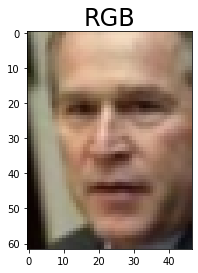

In [92]:
plt.imshow(lfw_people_images[indexes_george_bush[0]])
plt.title("RGB", fontsize=24)
plt.show()

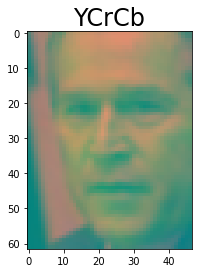

In [93]:
YCrCb = cv.cvtColor(lfw_people_images[indexes_george_bush[0]], cv.COLOR_RGB2YCR_CB)

plt.imshow(YCrCb)
plt.title("YCrCb", fontsize=24)
plt.show()

# Histogram generator

In [8]:
histogram_cr = np.zeros(256)
histogram_cb = np.zeros(256)


for index in indexes_george_bush:
    image = lfw_people_images[index]
    YCrCb = cv.cvtColor(image, cv.COLOR_RGB2YCR_CB)
    histr = cv.calcHist([YCrCb],[1],None,[256],[0,256])
    histogram_cr += histr.ravel()
    histr = cv.calcHist([YCrCb],[2],None,[256],[0,256])
    histogram_cb += histr.ravel()
    
histogram_cr /= indexes_george_bush.shape[0]
histogram_cb /= indexes_george_bush.shape[0]

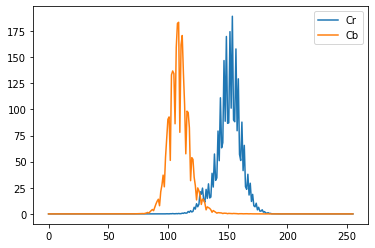

In [9]:
plt.plot(histogram_cr)
plt.plot(histogram_cb)

plt.legend(["Cr", "Cb"])
plt.show()

In [13]:
max_cr = np.argmax(histogram_cr)
max_cb = np.argmax(histogram_cb)

# Tony Blair skin extraction

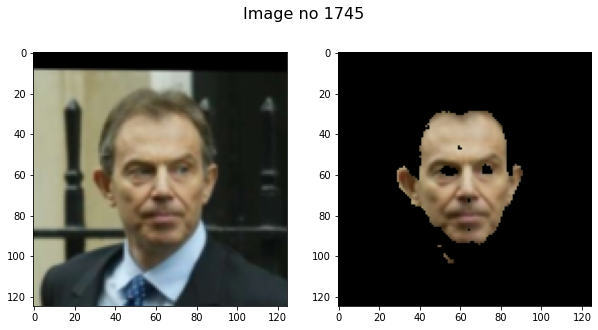

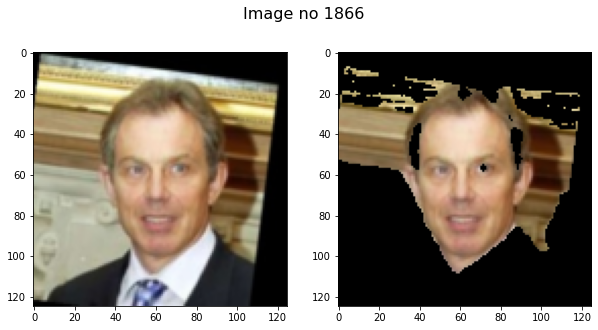

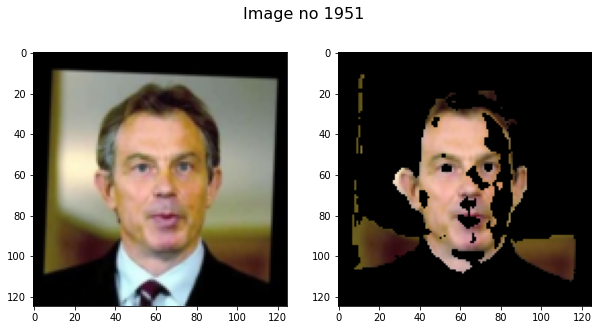

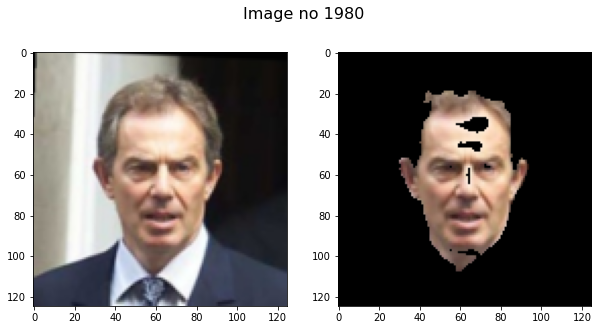

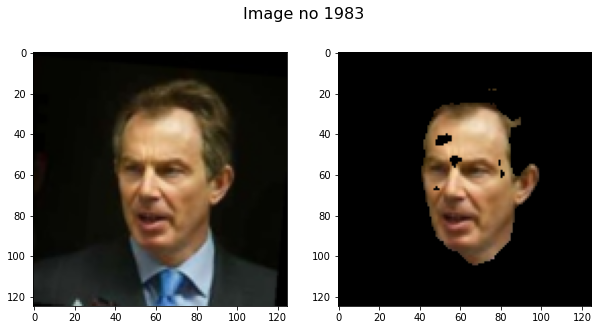

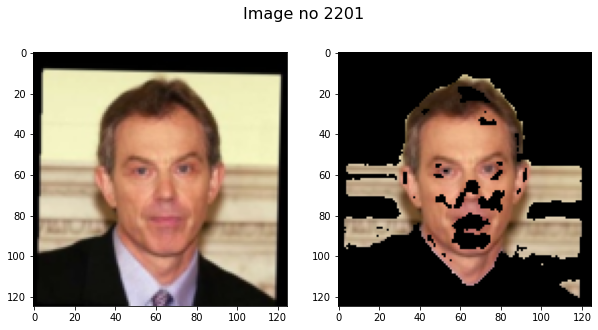

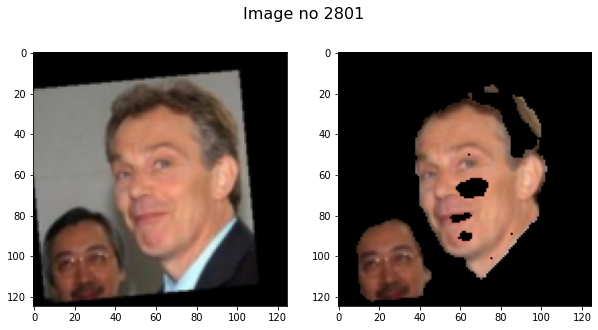

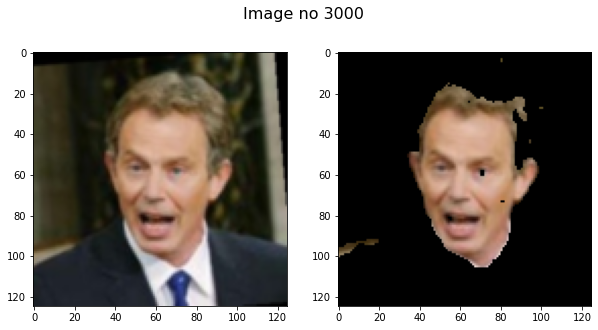

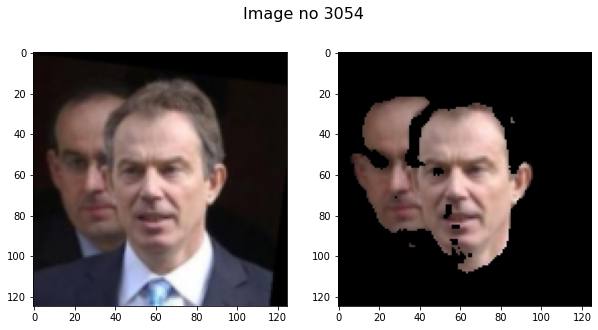

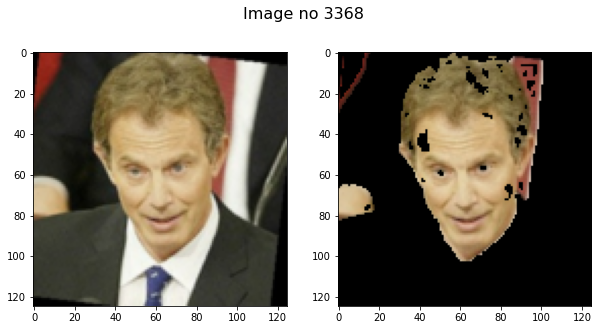

In [209]:
for index in indexes_tony_blair[20:30]:
    fig = plt.figure(1, figsize=(10, 5))
    ax = fig.add_subplot(121)
    ax.imshow(lfw_people_images_no_slice[index])
    ax = fig.add_subplot(122)
    ax.imshow(generateBinarizedImage(lfw_people_images_no_slice[index], max_cr=max_cr, max_cb=max_cb, shift=16))
    fig.suptitle(f'Image no {index}', fontsize=16)
    plt.show()

# Other images tests

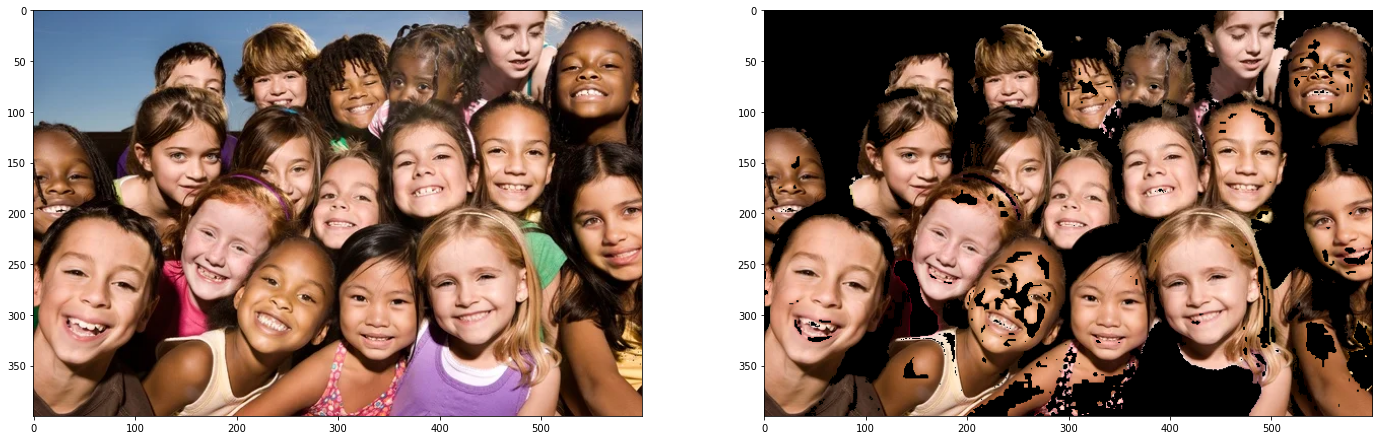

In [191]:
image = cv.imread("DCA963E9-EAC9-4B42-94EC7F7A745B65FC.webp")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

fig = plt.figure(1, figsize=(24, 10))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(generateBinarizedImage(image, max_cr=max_cr, max_cb=max_cb, shift=16))
plt.show()

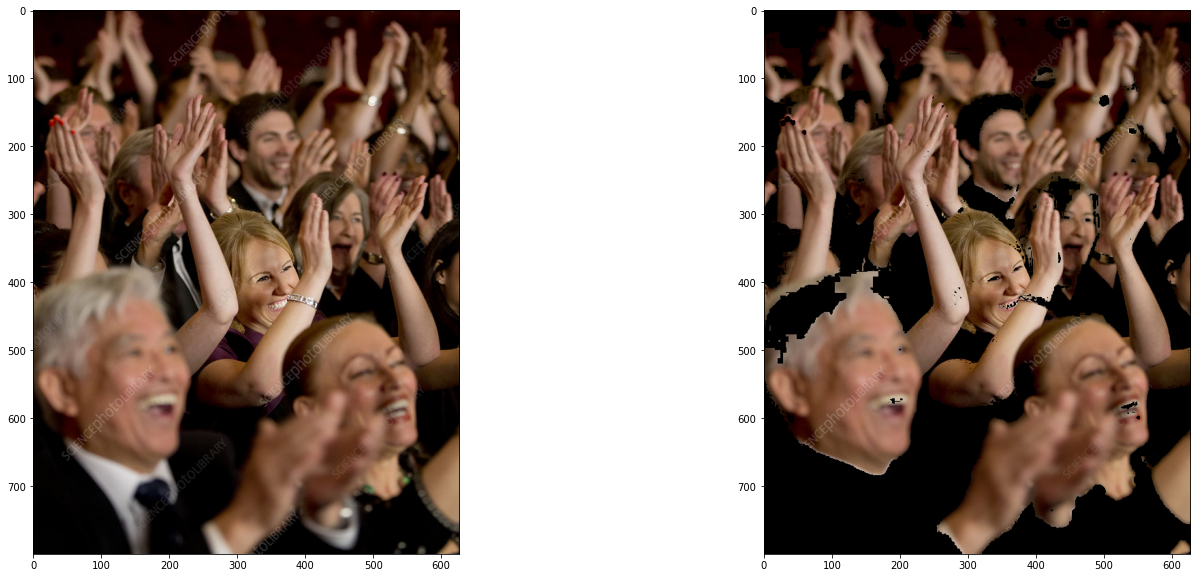

In [192]:
image = cv.imread("f0141788-800px-wm.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

fig = plt.figure(1, figsize=(24, 10))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(generateBinarizedImage(image, max_cr=max_cr, max_cb=max_cb, shift=16))
plt.show()

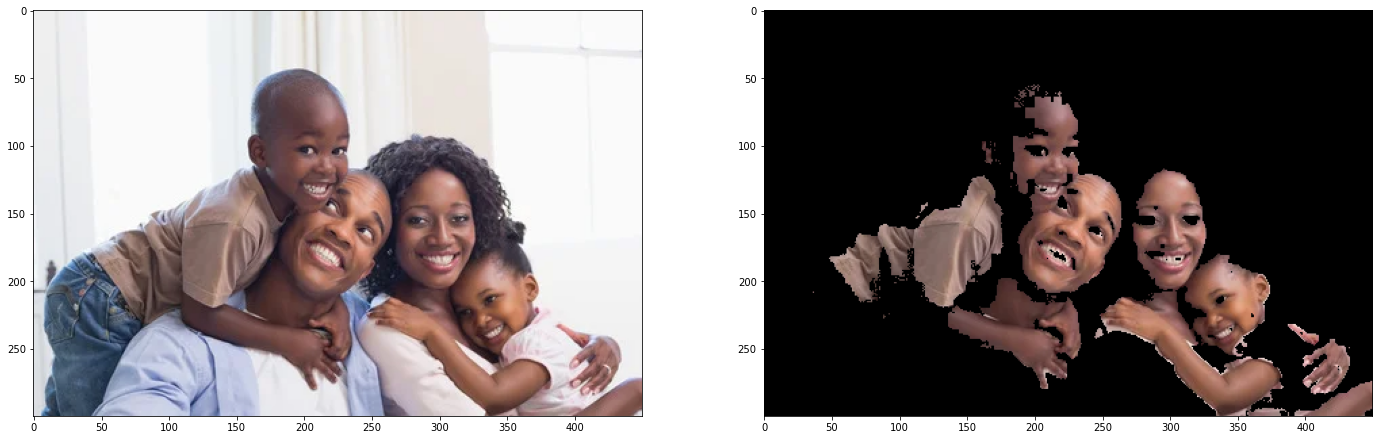

In [193]:
image = cv.imread("30889078-happy-family-posing-on-the-couch-together-at-home-in-the-living-room.webp")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

fig = plt.figure(1, figsize=(24, 10))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(generateBinarizedImage(image, max_cr=max_cr, max_cb=max_cb, shift=16))
plt.show()

---
 # Loading ORL database

In [169]:
directory_name = "orl"
images_names = os.listdir(directory_name)

template = np.zeros((80, 70))
counter = 0
for image in images_names:
    try:
        template += np.array(imageio.imread(os.path.join(directory_name, image)))
        counter += 1
    except:
        pass
    
template /= counter
print(f"Loaded images: {counter}")
template = template.astype("uint8")

Loaded images: 400


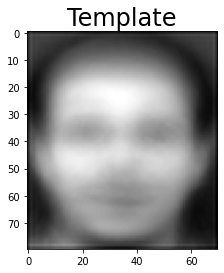

In [170]:
plt.imshow(template, cmap="gray")
plt.title("Template", fontsize=24)
plt.show()

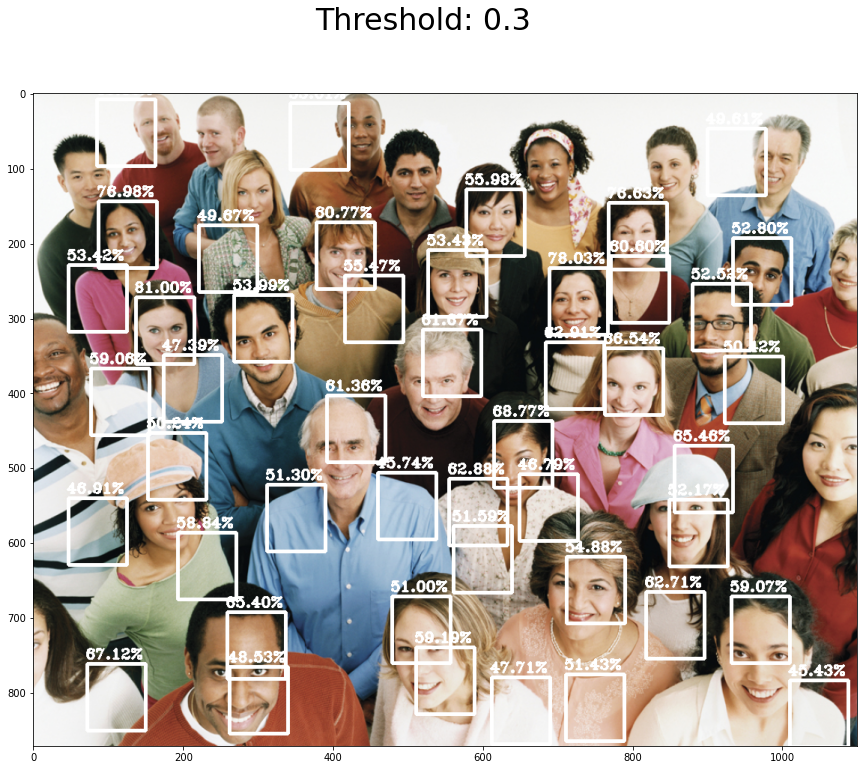

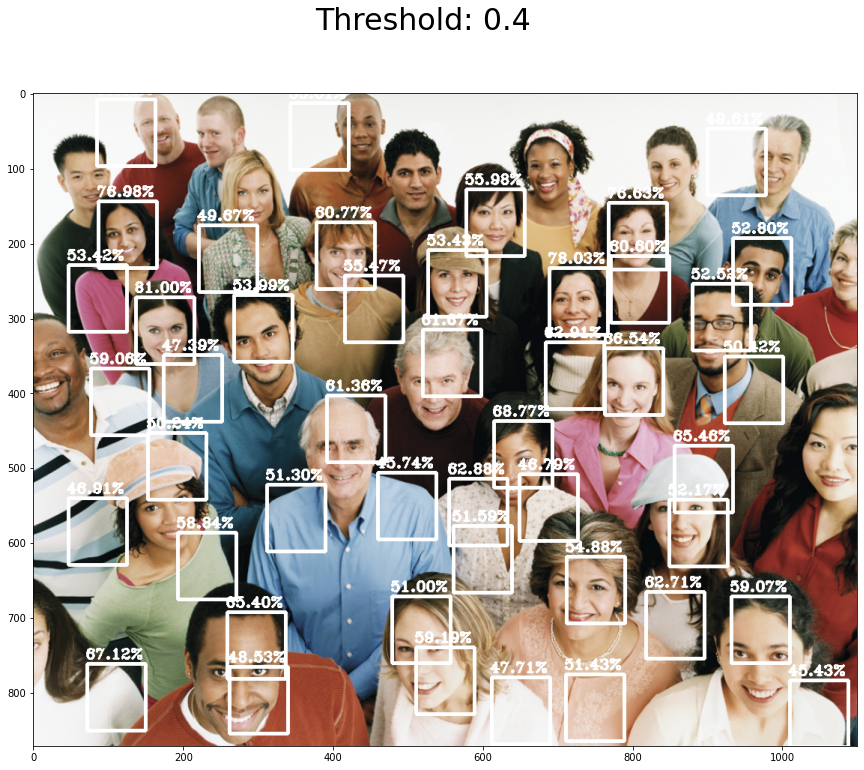

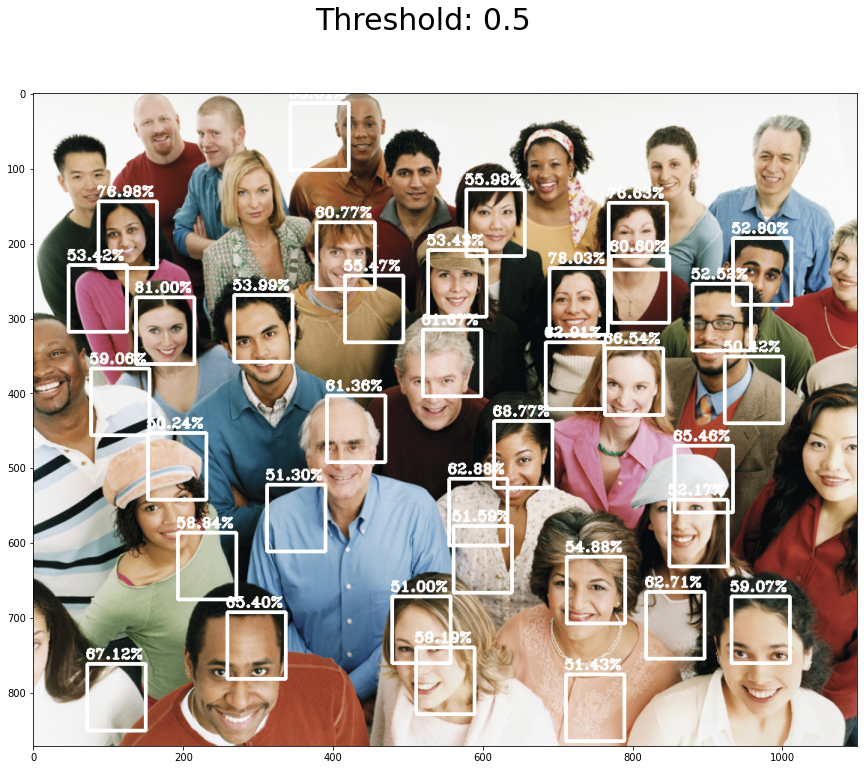

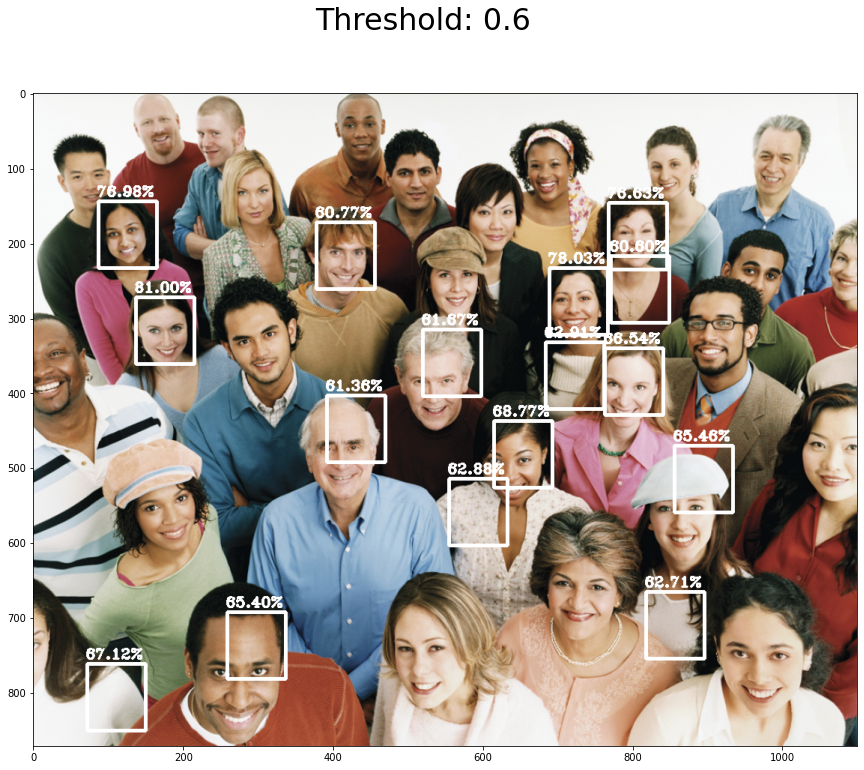

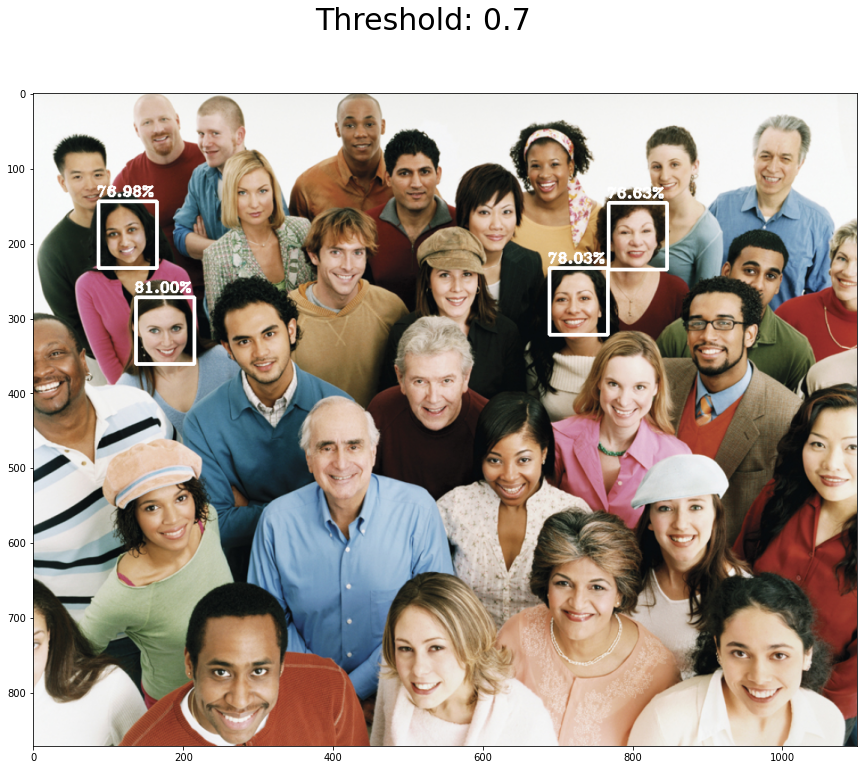

In [212]:

for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    image = cv.imread('people-racial-diversity.jpg', 0)
    image2 = cv.imread('people-racial-diversity.jpg')
    image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
    
    scale_percent = 110
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)

    image2 = cv.resize(image2, dim, interpolation = cv.INTER_AREA)
    image = cv.resize(image, dim, interpolation = cv.INTER_AREA)
    
    
    h, w = template2.shape[:2]

    method = cv.TM_CCOEFF_NORMED


    res = cv.matchTemplate(image, template2, method)

    max_val = 1
    prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = None, None, None, None
    while max_val > threshold:
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        if prev_min_val == min_val and prev_max_val == max_val and prev_min_loc == min_loc and prev_max_loc == max_loc:
            break
        else:
            prev_min_val, prev_max_val, prev_min_loc, prev_max_loc = min_val, max_val, min_loc, max_loc

        if max_val > threshold:
            start_row = max_loc[1] - h // 2 if max_loc[1] - h // 2 >= 0 else 0
            end_row = max_loc[1] + h // 2 + 1 if max_loc[1] + h // 2 + 1 <= res.shape[0] else res.shape[0]
            start_col = max_loc[0] - w // 2 if max_loc[0] - w // 2 >= 0 else 0
            end_col = max_loc[0] + w // 2 + 1 if max_loc[0] + w // 2 + 1 <= res.shape[1] else res.shape[0]

            res[start_row: end_row, start_col: end_col] = 0
            image2 = cv.rectangle(image2,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (255,255,255), 3)
            cv.putText(image2, f"{max_val*100:.2f}%", (max_loc[0]-2, max_loc[1]-7), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 2)
            

    fig = plt.figure(1, figsize=(24,12))
    ax = fig.add_subplot(111)
    ax.imshow(image2)
    fig.suptitle(f'Threshold: {threshold}', fontsize=30)

    plt.show()